In [4]:
# Make sure you have installed: transformers, datasets, evaluate, scikit-learn, seaborn, matplotlib
import pandas as pd
import numpy as np

In [ ]:
# Load & inspect the data
df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Foundation/IMDB Dataset.csv")                # Load IMDB CSV
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
df['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


In [ ]:
# Basic feature engineering: map sentiment to numeric
df['label'] = df['sentiment'].map({'negative': 0, 'positive': 1})

In [ ]:
# Exploratory Data Analysis (EDA)
import seaborn as sns
import matplotlib.pyplot as plt

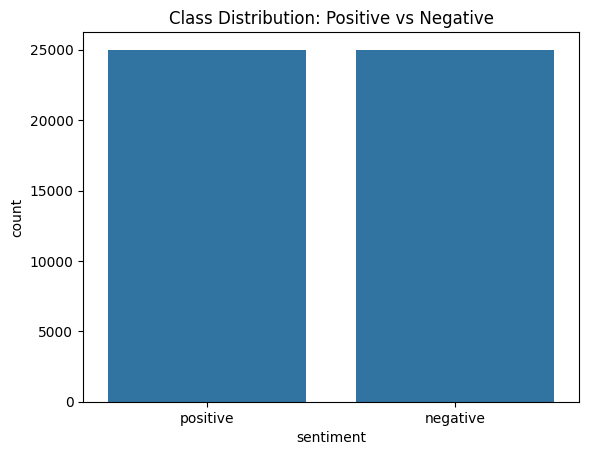

In [ ]:
# Class distribution
sns.countplot(x='sentiment', data=df)
plt.title('Class Distribution: Positive vs Negative')
plt.show()

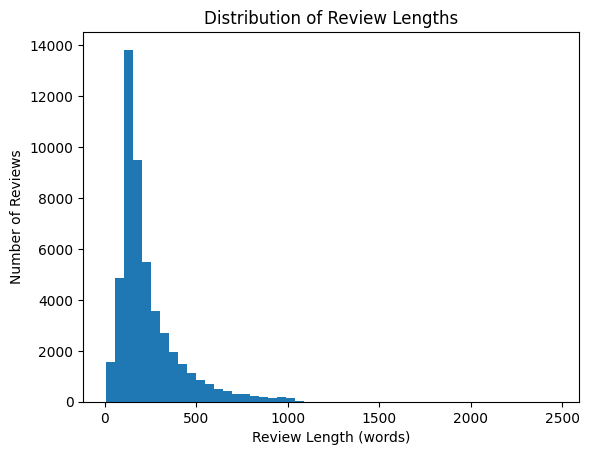

In [ ]:
# Review length distribution
df['review_len'] = df['review'].apply(lambda x: len(x.split()))
plt.hist(df['review_len'], bins=50)
plt.xlabel('Review Length (words)')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Review Lengths')
plt.show()

In [ ]:
# Train/Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df['review'], df['label'], test_size=0.2, random_state=42, stratify=df['label']
)

In [ ]:
# Baseline model: TF-IDF + Logistic Regression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [ ]:
# Vectorize text to TF-IDF features
tfidf = TfidfVectorizer(max_features=20000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)

In [ ]:
# Train Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Evaluate baseline
y_pred_lr = lr.predict(X_test_tfidf)
print("Baseline Logistic Regression\n")
print(classification_report(y_test, y_pred_lr))

Baseline Logistic Regression

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      5000
           1       0.90      0.91      0.91      5000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



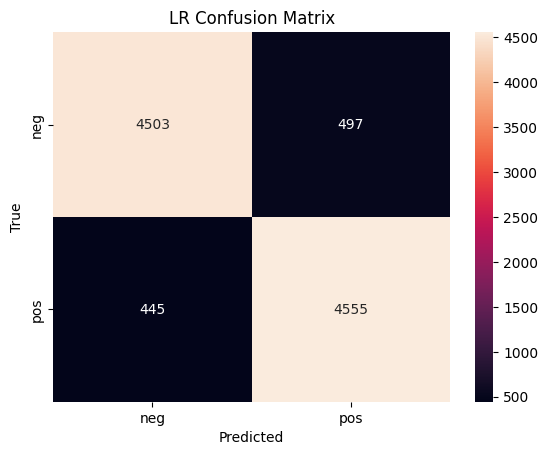

In [ ]:
# Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', xticklabels=['neg','pos'], yticklabels=['neg','pos'])
plt.title('LR Confusion Matrix')
plt.xlabel('Predicted'); plt.ylabel('True')
plt.show()

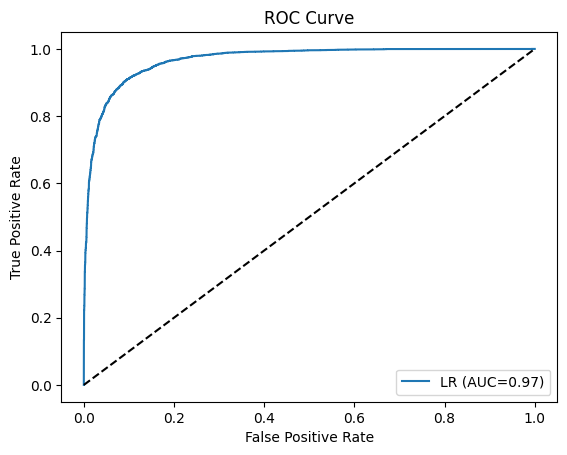

In [ ]:
# ROC curve for baseline
y_proba_lr = lr.predict_proba(X_test_tfidf)[:,1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, label=f'LR (AUC={roc_auc_lr:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.legend(); plt.show()

In [18]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 22.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which

In [19]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 4.1 MB/s eta 0:00:00


In [20]:
!pip install accelerate bitsandbytes deepspeed

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 25.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 108.5 MB/s eta 0:00:00
   

In [ ]:
!pip install -U bitsandbytes

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/75.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/75.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/75.4 MB ? eta -:--:--
   ---------------------------------------- 0.5/75.4 MB 1.0 MB/s eta 0:01:12
   ---------------------------------------- 0.8/75.4 MB 1.0 MB/s eta 0:01:12
   ---------------------------------------- 0.8/75.4 MB 1.0 MB/s eta 0:01:12
    --------------------------------------- 1.0/75.4 MB 931.8 kB/s eta 0:01:20
    --------------------------------------- 1.0/75.4 MB 931.8 kB/s eta 0:01:20
    --------------------------------------- 1.3/75.4 MB 871.6 kB/s eta 0:01:26
    --------------------------------------- 1.6/75.4 MB 883.2 kB/s eta 0:01:24
    --------------------------------------- 1.8/75.4 MB 915.0 kB/s eta 0:01:21
   - -------------------------------------- 2.1/75.4 MB 954.7 kB/s eta 0:01:17
   - --

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Fine-tune BERT with Hugging Face Transformers
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import TrainingArguments, Trainer
import evaluate

In [24]:
import torch
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    TrainingArguments,
    Trainer,
    BitsAndBytesConfig
)
import evaluate

In [ ]:
# Tokenizer and dataset setup (same as before)…
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
# Attempt bits-and-bytes 8-bit quantization
use_8bit = True
try:
    bnb_config = BitsAndBytesConfig(load_in_8bit=True)
    model = AutoModelForSequenceClassification.from_pretrained(
        "distilbert-base-uncased",
        quantization_config=bnb_config,
        num_labels=2,
    )
    print("✅ Loaded model with 8-bit quantization")
except Exception as e:
    print("❌ 8-bit quant failed:", e)
    print("⚙️  Falling back to standard FP16 model")
    use_8bit = False
    model = AutoModelForSequenceClassification.from_pretrained(
        "distilbert-base-uncased",
        num_labels=2,
    )

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

❌ 8-bit quant failed: 'Parameter' object has no attribute 'SCB'
⚙️  Falling back to standard FP16 model


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Enable mixed precision & (optionally) gradient checkpointing
training_args = TrainingArguments(
    output_dir="./bert_speedup",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    gradient_accumulation_steps=2,
    fp16=True,                     # mixed precision
    optim="adamw_bnb_8bit" if use_8bit else "adamw_torch",
    logging_steps=50,
    save_strategy="no",
)

In [ ]:
# (Optional) gradient checkpointing for very large models
if not use_8bit:
    model.gradient_checkpointing_enable()

In [ ]:
# Prepare Hugging Face Datasets
train_df = pd.DataFrame({'text': X_train.values, 'label': y_train.values})
test_df  = pd.DataFrame({'text': X_test.values,  'label': y_test.values})
train_ds = Dataset.from_pandas(train_df)
test_ds  = Dataset.from_pandas(test_df)

In [ ]:
# Tokenization function
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')
def tokenize(batch):
    return tokenizer(batch['text'], padding='max_length', truncation=True, max_length=128)

In [32]:
train_ds = train_ds.map(tokenize, batched=True)
test_ds  = test_ds.map(tokenize, batched=True)

Map:   0%|          | 0/40000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [ ]:
# Set format for PyTorch
train_ds = train_ds.remove_columns(['text'])
test_ds  = test_ds.remove_columns(['text'])
train_ds.set_format('torch', columns=['input_ids','attention_mask','label'])
test_ds.set_format('torch', columns=['input_ids','attention_mask','label'])

In [34]:
# 6.4 Load model & define Trainer
model = AutoModelForSequenceClassification.from_pretrained(
    'distilbert-base-uncased', num_labels=2
)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [35]:
accuracy_metric = evaluate.load('accuracy')
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    return accuracy_metric.compute(predictions=preds, references=labels)

In [36]:
training_args = TrainingArguments(
    output_dir='./bert_out',
    num_train_epochs=2,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    save_strategy='no',
    logging_steps=100,
)

In [37]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [ ]:
# Train & evaluate
trainer.train()
bert_results = trainer.evaluate()
print("BERT Evaluation:", bert_results)

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: hmsk-tech (hmsk-tech-slrtdc) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss
100,0.506400
200,0.416500
300,0.399800
400,0.357900
500,0.371600
600,0.369300
700,0.353200
800,0.377900
900,0.365900
1000,0.355700


BERT Evaluation: {'eval_loss': 0.3281409740447998, 'eval_accuracy': 0.8934, 'eval_runtime': 8.9827, 'eval_samples_per_second': 1113.255, 'eval_steps_per_second': 34.845, 'epoch': 2.0}


In [ ]:
# BERT: Confusion matrix & ROC
import torch
pred_out = trainer.predict(test_ds)
bert_preds = np.argmax(pred_out.predictions, axis=-1)

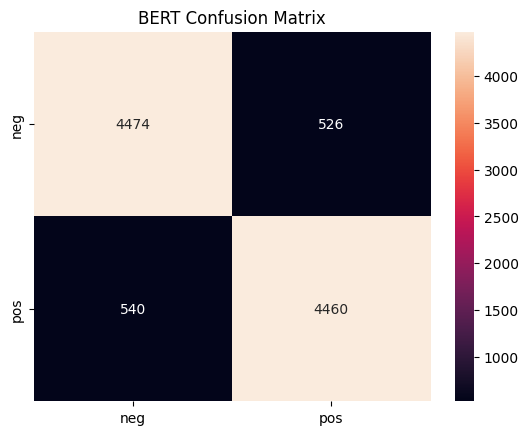

In [40]:
cm_bert = confusion_matrix(test_df['label'], bert_preds)
sns.heatmap(cm_bert, annot=True, fmt='d',
            xticklabels=['neg','pos'], yticklabels=['neg','pos'])
plt.title('BERT Confusion Matrix'); plt.show()

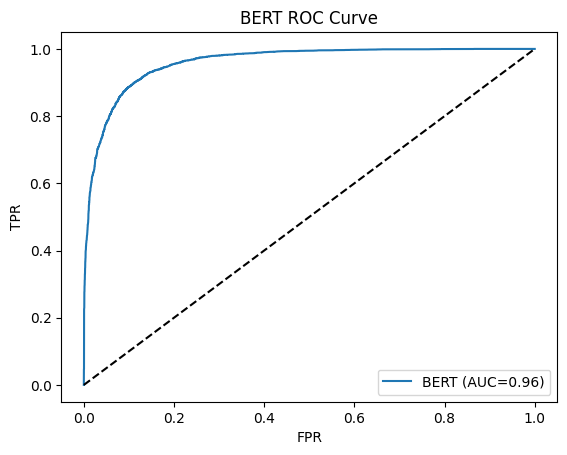

In [41]:
bert_probs = torch.softmax(torch.tensor(pred_out.predictions), dim=1)[:,1].numpy()
fpr_b, tpr_b, _ = roc_curve(test_df['label'], bert_probs)
roc_auc_b = auc(fpr_b, tpr_b)
plt.plot(fpr_b, tpr_b, label=f'BERT (AUC={roc_auc_b:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.title('BERT ROC Curve'); plt.xlabel('FPR'); plt.ylabel('TPR'); plt.legend(); plt.show()